In [1]:
import pandas as pd
import numpy as np

In [2]:
datasets = ('weather.csv')

df_weather = pd.read_csv(datasets)
print(f'Full train dataset shape is {df_weather.shape}')

Full train dataset shape is (366, 22)


In [3]:
df_weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
null_pct = df_weather.apply(pd.isnull).sum()/df_weather.shape[0]
null_pct

MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.008197
WindGustDir      0.008197
WindGustSpeed    0.005464
WindDir9am       0.084699
WindDir3pm       0.002732
WindSpeed9am     0.019126
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

In [5]:
df_weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [6]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [7]:
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].replace({'Yes':1, 'No':0})
df_weather['RainTomorrow'].value_counts()

0    300
1     66
Name: RainTomorrow, dtype: int64

In [8]:
float_columns = df_weather.select_dtypes(include=['float64', 'int64'])
# float_columns
weather_corr = float_columns.corr()
weather_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551,0.233213
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557,0.049228
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860,0.133586
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762,0.090528
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823,-0.388754
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991,0.249596
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091,0.088940
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447,0.042505
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931,0.185077
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752,0.366882


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

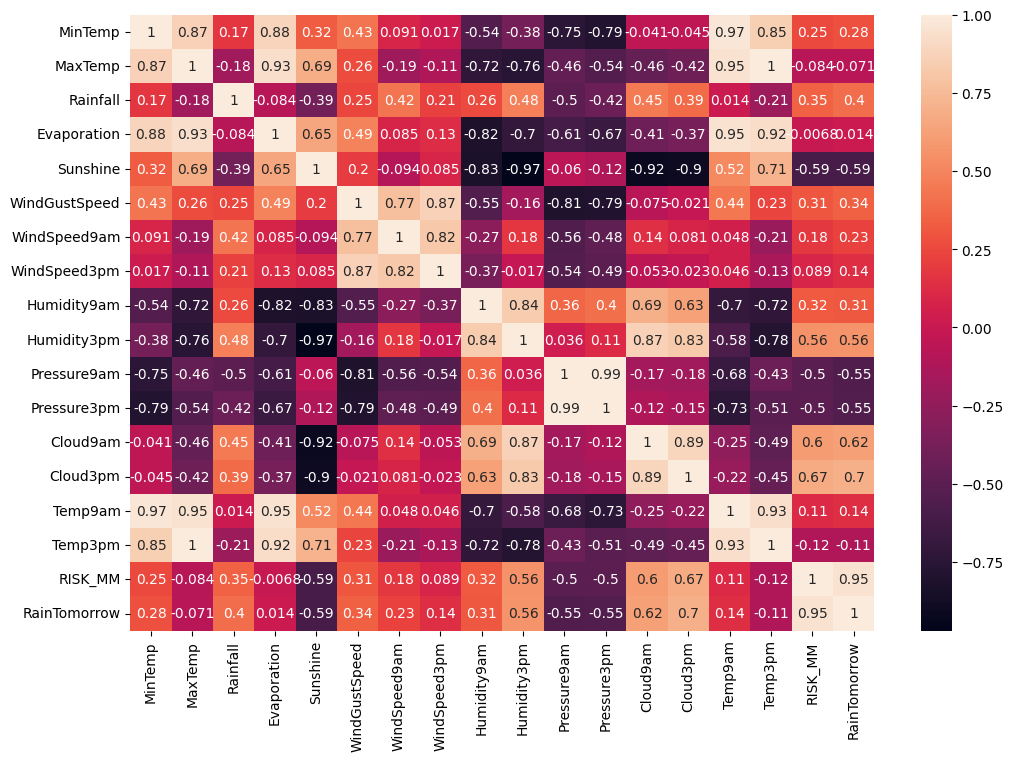

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(weather_corr.corr(), annot=True)
plt.savefig("heatmap.png")

In [11]:
weather_corr['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
RISK_MM          0.693024
Cloud3pm         0.388020
Humidity3pm      0.366882
Cloud9am         0.284579
WindGustSpeed    0.249596
MinTemp          0.233213
Humidity9am      0.185077
Temp9am          0.182170
Rainfall         0.133586
Evaporation      0.090528
WindSpeed9am     0.088940
MaxTemp          0.049228
WindSpeed3pm     0.042505
Temp3pm          0.011105
Pressure9am     -0.330047
Pressure3pm     -0.370247
Sunshine        -0.388754
Name: RainTomorrow, dtype: float64

In [12]:
filtered_corr = weather_corr[abs(weather_corr['RainTomorrow']) > 0.1]
filtered_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551,0.233213
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860,0.133586
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823,-0.388754
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991,0.249596
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931,0.185077
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752,0.366882
Pressure9am,-0.501707,-0.290883,-0.331581,-0.381906,0.006276,-0.540180,-0.356332,-0.359800,0.135727,-0.087946,1.000000,0.967895,-0.157553,-0.141000,-0.460418,-0.253674,-0.290584,-0.330047
Pressure3pm,-0.498007,-0.379394,-0.250218,-0.391093,-0.036201,-0.526885,-0.247952,-0.337325,0.134420,-0.010052,0.967895,1.000000,-0.128944,-0.143837,-0.492636,-0.345485,-0.311421,-0.370247
Cloud9am,0.215776,-0.175730,0.180046,-0.106007,-0.681092,-0.012666,0.101842,-0.026426,0.392842,0.551633,-0.157553,-0.128944,1.000000,0.525218,0.021041,-0.202344,0.273914,0.284579
Cloud3pm,0.118397,-0.135991,0.127792,-0.100045,-0.661131,0.050230,-0.022471,0.007207,0.271938,0.510108,-0.141000,-0.143837,0.525218,1.000000,0.040945,-0.172814,0.326455,0.388020


In [13]:
relevant_features = filtered_corr.index.tolist()

df_relevant_features = df_weather[relevant_features]
df_relevant_features

,MinTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RISK_MM,RainTomorrow
0,8.0,0.0,6.3,30.0,68,29,1019.7,1015.0,7,7,14.4,3.6,1
1,14.0,3.6,9.7,39.0,80,36,1012.4,1008.4,5,3,17.5,3.6,1
2,13.7,3.6,3.3,85.0,82,69,1009.5,1007.2,8,7,15.4,39.8,1
3,13.3,39.8,9.1,54.0,62,56,1005.5,1007.0,2,7,13.5,2.8,1
4,7.6,2.8,10.6,50.0,68,49,1018.3,1018.5,7,7,11.1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,0.0,12.1,76.0,38,15,1016.1,1010.8,1,3,20.4,0.0,0
362,7.1,0.0,12.7,48.0,45,22,1020.0,1016.9,0,1,17.2,0.0,0
363,12.5,0.0,5.3,43.0,63,47,1024.0,1022.8,3,2,14.5,0.0,0
364,12.5,0.0,7.1,46.0,69,39,1021.0,1016.2,6,7,15.8,0.0,0


In [14]:
weather_copy = df_relevant_features.copy()
weather_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   Rainfall       366 non-null    float64
 2   Sunshine       363 non-null    float64
 3   WindGustSpeed  364 non-null    float64
 4   Humidity9am    366 non-null    int64  
 5   Humidity3pm    366 non-null    int64  
 6   Pressure9am    366 non-null    float64
 7   Pressure3pm    366 non-null    float64
 8   Cloud9am       366 non-null    int64  
 9   Cloud3pm       366 non-null    int64  
 10  Temp9am        366 non-null    float64
 11  RISK_MM        366 non-null    float64
 12  RainTomorrow   366 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 37.3 KB


In [15]:
weather_copy.isnull().sum()

MinTemp          0
Rainfall         0
Sunshine         3
WindGustSpeed    2
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [16]:
weather_copy.fillna(method='ffill', inplace=True)
weather_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   Rainfall       366 non-null    float64
 2   Sunshine       366 non-null    float64
 3   WindGustSpeed  366 non-null    float64
 4   Humidity9am    366 non-null    int64  
 5   Humidity3pm    366 non-null    int64  
 6   Pressure9am    366 non-null    float64
 7   Pressure3pm    366 non-null    float64
 8   Cloud9am       366 non-null    int64  
 9   Cloud3pm       366 non-null    int64  
 10  Temp9am        366 non-null    float64
 11  RISK_MM        366 non-null    float64
 12  RainTomorrow   366 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 37.3 KB


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

x = weather_copy.drop(['RainTomorrow'], axis=1)
y = weather_copy['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
type(x)

pandas.core.frame.DataFrame

In [19]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('\n')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9594594594594594


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        58
           1       0.93      0.88      0.90        16

    accuracy                           0.96        74
   macro avg       0.95      0.93      0.94        74
weighted avg       0.96      0.96      0.96        74



<Axes: ylabel='Density'>

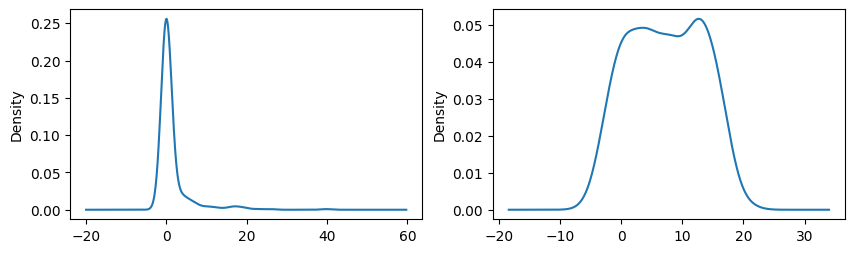

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
weather_copy['RISK_MM'].plot(kind='kde')

plt.subplot(2,2,2)
weather_copy['MinTemp'].plot(kind='kde')